In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mp_img
from pathlib import Path
import string

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import re

%matplotlib inline

In [2]:
train_lbl_file = './data/train/gt.txt'
test_lbl_file = './data/test/gt.txt'

train_lbls_src = list()
test_lbls_src = list()

with open(train_lbl_file) as train_f:
    train_lbls_src = train_f.readlines()
    
with open(test_lbl_file) as test_f:
    test_lbls_src = test_f.readlines()

In [4]:
print(train_lbls_src[:5])

['word_1.png, "PROPER"\n', 'word_2.png, "FOOD"\n', 'word_3.png, "PRONTO"\n', 'word_4.png, "professional"\n', 'word_5.png, "Java"\n']


In [6]:
train_lbls = list()
test_lbls = list()

for _, label in enumerate(train_lbls_src):
    train_lbls.append(label.strip().replace('"', ''))

for _, label in enumerate(test_lbls_src):
    test_lbls.append(label.strip().replace('"', ''))
    
print(train_lbls[:5])
print("====="*5)
print(test_lbls[:5])

['word_1.png, PROPER', 'word_2.png, FOOD', 'word_3.png, PRONTO', 'word_4.png, professional', 'word_5.png, Java']
['word_1.png, Tiredness', 'word_2.png, kills', 'word_3.png, A', 'word_4.png, short', 'word_5.png, break']


In [8]:
test_imgs_collector = Path("./data/test/").glob("*.png")
train_imgs_collector = Path("./data/train/").glob("*.png")

test_imgs_strs = [str(p) for p in test_imgs_collector]
train_imgs_strs = [str(p) for p in train_imgs_collector]

In [19]:
sorted_test_imgs = np.sort(test_imgs_strs)
sorted_test_lbls = np.sort(test_lbls)
sorted_train_imgs = np.sort(train_imgs_strs)
sorted_train_lbls = np.sort(train_lbls)

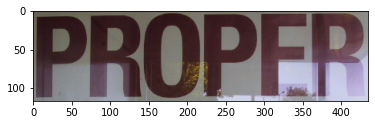

word_1.png, PROPER



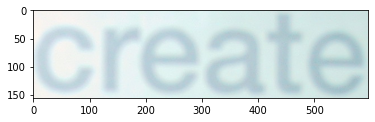

word_10.png, create



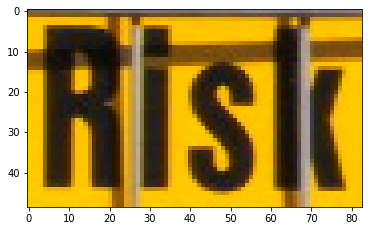

word_100.png, Risk



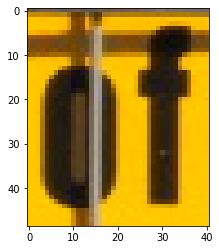

word_101.png, of



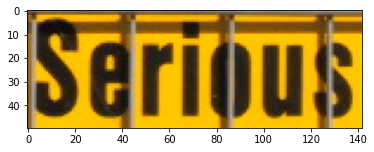

word_102.png, Serious



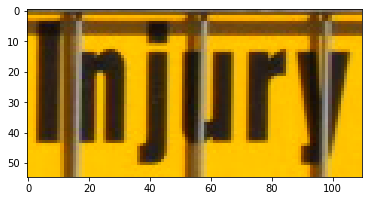

word_103.png, Injury



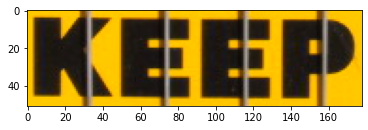

word_104.png, KEEP



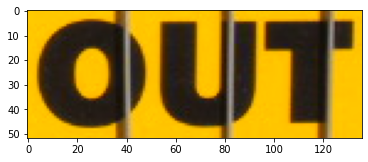

word_105.png, OUT



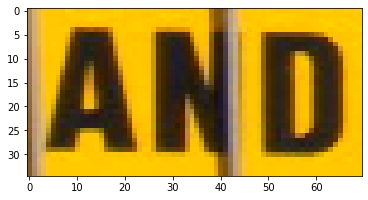

word_106.png, AND



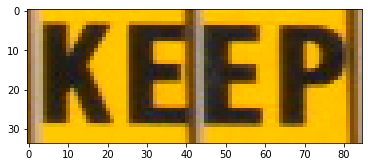

word_107.png, KEEP



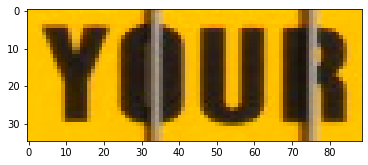

word_108.png, YOUR



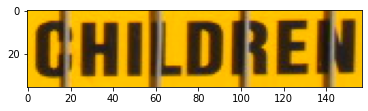

word_109.png, CHILDREN



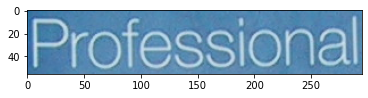

word_11.png, Professional



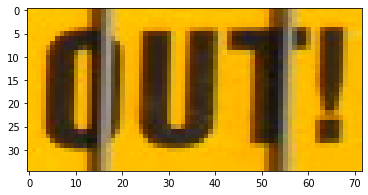

word_110.png, OUT!



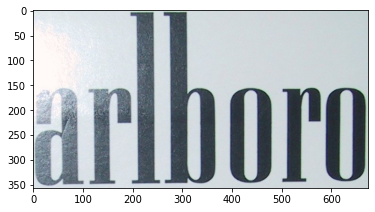

word_111.png, arlboro



In [21]:
images = list()

for i in range(15):
    temp = mp_img.imread(sorted_train_imgs[i])
    images.append(temp)
    
for i, img in enumerate(images):
    plt.imshow(img)
    plt.show()
    print(sorted_train_lbls[i])
    print()

In [24]:
if 'base_cnn' in locals():
    del base_cnn

softmax_classes = len(string.printable)
input_shape = (100, 32, 1)

base_cnn = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Conv2D(64, (3, 3), padding = "same", activation = "relu", name = "cov_layer1"),
        layers.Conv2D(64, (3, 3), padding = "same", activation = "relu", name = "cov_layer2"),
        layers.MaxPooling2D((2, 2), name = "pool1"),
        layers.Conv2D(64, (3, 3), padding = "same", activation = "relu", name = "cov_layer3"),
        layers.Conv2D(64, (3, 3), padding = "same", activation = "relu", name = "cov_layer4"),
        layers.MaxPooling2D((2, 2), name = "pool2"),
        layers.Conv2D(64, (3, 3), padding = "same", activation = "relu", name = "cov_layer5"),
        layers.Conv2D(64, (3, 3), padding = "same", activation = "relu", name = "cov_layer6"),
        layers.MaxPooling2D((2, 2), name = "pool3"),
        layers.Conv2D(64, (3, 3), padding = "same", activation = "relu", name = "cov_layer7"),
        layers.Conv2D(64, (3, 3), padding = "same", activation = "relu", name = "cov_layer8"),
        layers.Flatten(),
        layers.Dense(units = 4096),
        layers.Dense(units = 4096),
        layers.Dense(softmax_classes, activation = "softmax")
    ],
    name = 'base_cnn'
)

base_cnn.summary()

Model: "base_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cov_layer1 (Conv2D)         (None, 100, 32, 64)       640       
                                                                 
 cov_layer2 (Conv2D)         (None, 100, 32, 64)       36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 50, 16, 64)        0         
                                                                 
 cov_layer3 (Conv2D)         (None, 50, 16, 64)        36928     
                                                                 
 cov_layer4 (Conv2D)         (None, 50, 16, 64)        36928     
                                                                 
 pool2 (MaxPooling2D)        (None, 25, 8, 64)         0         
                                                                 
 cov_layer5 (Conv2D)         (None, 25, 8, 64)         369

In [26]:
batch_size = 256
lr =  0.002
optimizer = keras.optimizers.SGD(learning_rate = lr)
loss = 1